In [1]:
import pandas as pd

In [2]:
car = pd.read_csv('audi.csv')

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 625.1+ KB


In [4]:
car['model'].value_counts()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64

In [5]:
car['transmission'].value_counts()

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

In [6]:
car['fuelType'].value_counts()

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

In [7]:
# Convert Categorical to numeric variable 

car['model'] = pd.factorize(car.model)[0]
car['transmission'] = pd.factorize(car.transmission)[0]
car['fuelType'] = pd.factorize(car.fuelType)[0]

In [8]:
car['model'].value_counts()

3     1929
4     1417
2     1381
0     1347
6      882
5      877
8      822
1      748
11     397
10     336
9      122
14     118
15      69
12      39
13      33
16      31
17      29
18      28
22      18
19      16
7       12
21       8
20       4
23       3
24       1
25       1
Name: model, dtype: int64

In [9]:
car['transmission'].value_counts()

# 0 - Semi-Auto
# 1 - Automatic
# 2 - Manual
# 3 - Other           

0    4369
2    3591
1    2708
Name: transmission, dtype: int64

In [10]:
car['fuelType'].value_counts()

# 0 - Diesel
# 1 - Petrol    
# 2 - Hybrid     
# 3 - Other        

1    5577
0    5063
2      28
Name: fuelType, dtype: int64

In [11]:
car.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,0,15735,0,150,55.4,1.4
1,1,2016,16500,1,36203,1,20,64.2,2.0
2,0,2016,11000,0,29946,0,30,55.4,1.4
3,2,2017,16800,1,25952,1,145,67.3,2.0
4,3,2019,17300,0,1998,0,145,49.6,1.0


In [12]:
car.describe()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,10668.00000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,4.33727,2017.100675,22896.685039,0.927072,24827.244001,0.528028,126.011436,50.770022,1.930709
std,3.64408,2.167494,11714.841888,0.860760,23505.257205,0.504468,67.170294,12.949782,0.602957
min,0.00000,1997.000000,1490.000000,0.000000,1.000000,0.000000,0.000000,18.900000,0.000000
25%,2.00000,2016.000000,15130.750000,0.000000,5968.750000,0.000000,125.000000,40.900000,1.500000
50%,3.00000,2017.000000,20200.000000,1.000000,19000.000000,1.000000,145.000000,49.600000,2.000000
75%,6.00000,2019.000000,27990.000000,2.000000,36464.500000,1.000000,145.000000,58.900000,2.000000
max,25.00000,2020.000000,145000.000000,2.000000,323000.000000,2.000000,580.000000,188.300000,6.300000


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<AxesSubplot:title={'center':'model'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'transmission'}>,
        <AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'fuelType'}>],
       [<AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'engineSize'}>]], dtype=object)

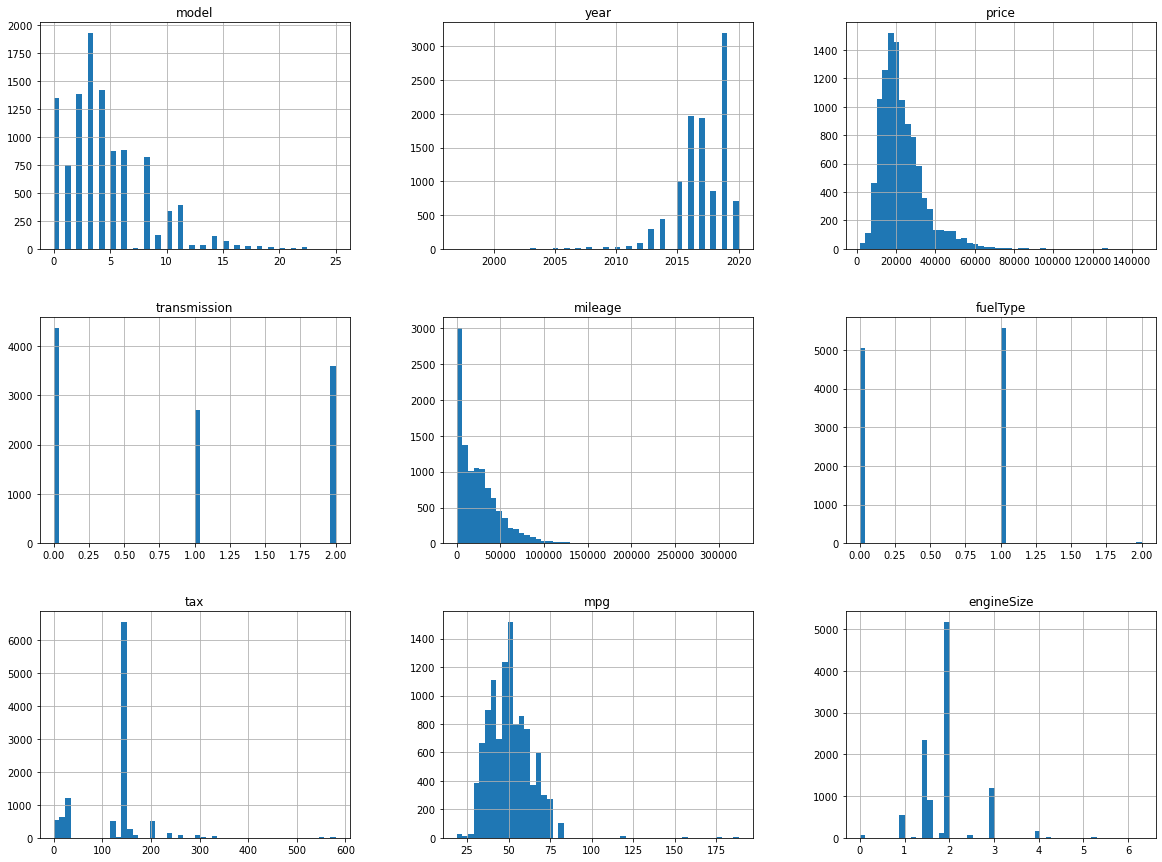

In [14]:
car.hist(bins=50, figsize=(20,15))

## Train-Test Splitting

In [15]:
x = car.drop('price', axis=1)
y = car['price']

In [16]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
feature_train.shape

(8534, 8)

In [18]:
label_train.shape

(8534,)

In [19]:
car.shape

(10668, 9)

## Looking for Correlations

In [20]:
corr_matrix = car.corr()
corr_matrix

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
model,1.000000,0.112147,0.537631,0.185134,-0.121429,0.063855,0.409339,-0.413523,0.514606
year,0.112147,1.000000,0.592581,0.254572,-0.789667,-0.119869,0.093066,-0.351281,-0.031582
price,0.537631,0.592581,1.000000,0.418419,-0.535357,0.036633,0.356157,-0.600334,0.591262
transmission,0.185134,0.254572,0.418419,1.000000,-0.205680,0.025002,0.306599,-0.336363,0.340522
mileage,-0.121429,-0.789667,-0.535357,-0.205680,1.000000,0.239618,-0.166547,0.395103,0.070710
fuelType,0.063855,-0.119869,0.036633,0.025002,0.239618,1.000000,-0.106313,0.357648,0.363532
tax,0.409339,0.093066,0.356157,0.306599,-0.166547,-0.106313,1.000000,-0.635909,0.393075
mpg,-0.413523,-0.351281,-0.600334,-0.336363,0.395103,0.357648,-0.635909,1.000000,-0.365621
engineSize,0.514606,-0.031582,0.591262,0.340522,0.070710,0.363532,0.393075,-0.365621,1.000000


In [21]:
corr_matrix['price'].sort_values(ascending=False)

price           1.000000
year            0.592581
engineSize      0.591262
model           0.537631
transmission    0.418419
tax             0.356157
fuelType        0.036633
mileage        -0.535357
mpg            -0.600334
Name: price, dtype: float64

In [22]:
clm = car.columns

array([[<AxesSubplot:xlabel='model', ylabel='model'>,
        <AxesSubplot:xlabel='year', ylabel='model'>,
        <AxesSubplot:xlabel='price', ylabel='model'>,
        <AxesSubplot:xlabel='transmission', ylabel='model'>,
        <AxesSubplot:xlabel='mileage', ylabel='model'>,
        <AxesSubplot:xlabel='fuelType', ylabel='model'>,
        <AxesSubplot:xlabel='tax', ylabel='model'>,
        <AxesSubplot:xlabel='mpg', ylabel='model'>,
        <AxesSubplot:xlabel='engineSize', ylabel='model'>],
       [<AxesSubplot:xlabel='model', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='price', ylabel='year'>,
        <AxesSubplot:xlabel='transmission', ylabel='year'>,
        <AxesSubplot:xlabel='mileage', ylabel='year'>,
        <AxesSubplot:xlabel='fuelType', ylabel='year'>,
        <AxesSubplot:xlabel='tax', ylabel='year'>,
        <AxesSubplot:xlabel='mpg', ylabel='year'>,
        <AxesSubplot:xlabel='engineSize', ylabel='year'>],
       [<Ax

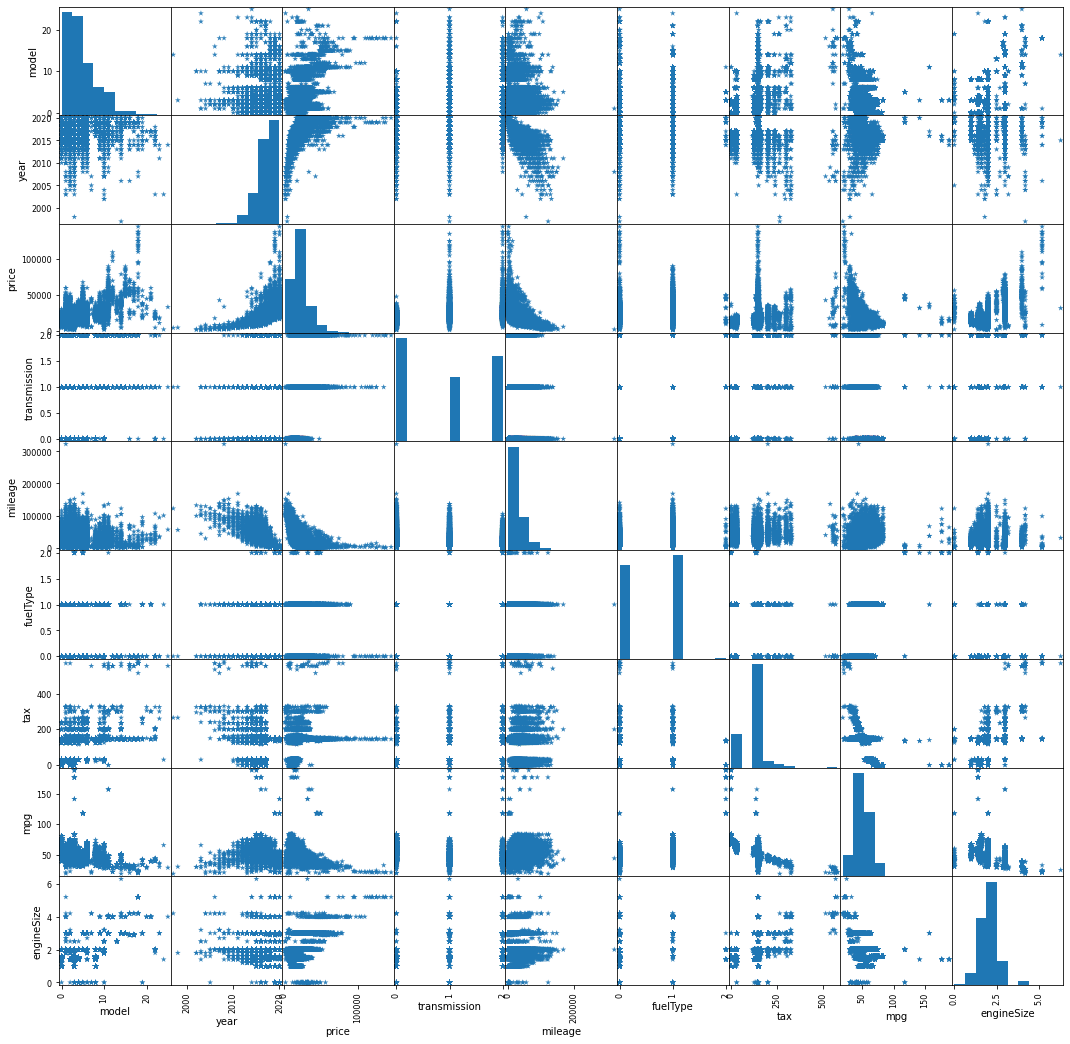

In [23]:
from pandas.plotting import scatter_matrix
attributes = clm
scatter_matrix(car[attributes], figsize=(18,18), alpha=0.9, marker='*')

<AxesSubplot:xlabel='mileage', ylabel='price'>

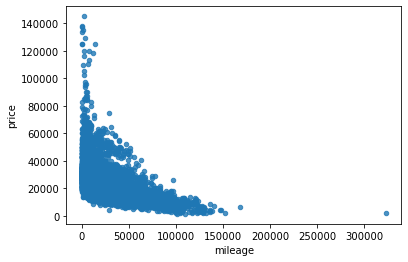

In [24]:
car.plot(kind="scatter", x="mileage", y="price", alpha=0.8)

<AxesSubplot:xlabel='year', ylabel='price'>

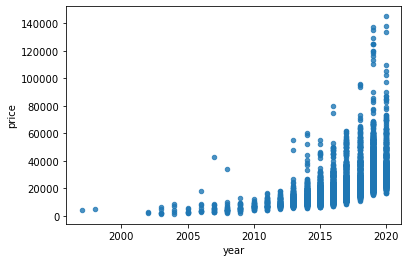

In [25]:
car.plot(kind="scatter", x="year", y="price", alpha=0.8)

## Missing Attributes

In [26]:
car.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

## Imputer

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def imp(features):
    imputer = SimpleImputer(strategy = "median")
    imputer.fit(features)
    #print("imputer.statistics_ : \n",imputer.statistics_, "\n")
    #print("imputer.statistics_.shape : \n",imputer.statistics_.shape, "\n")
    
    X = imputer.transform(features)
    features_tr = pd.DataFrame(X, columns=features.columns)
    
    #print("features.describe() :\n",features.describe(), "\n")
    #print("features_tr.head() : \n",features_tr.head(),"\n")
    
    # Creating a Pipeline
    my_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
    
    features_num_tr = my_pipeline.fit_transform(features_tr)
    
    return features_num_tr

In [28]:
feature_train

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
5398,3,2019,0,5922,1,145,51.4,1.6
5860,4,2013,2,48250,1,205,47.9,2.0
906,13,2016,2,29920,0,300,34.9,2.5
8065,1,2013,1,87567,1,145,56.5,2.0
6520,8,2019,0,100,1,145,49.6,1.6
...,...,...,...,...,...,...,...,...
5734,11,2017,1,38513,1,300,39.2,4.0
5191,2,2017,0,35543,0,145,53.3,1.4
5390,2,2019,2,9893,1,145,48.7,2.0
860,0,2020,0,556,0,145,47.9,1.0


In [29]:
feature_test

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
10442,2,2012,0,49500,1,30,62.8,2.0
2907,3,2019,0,4352,1,145,51.4,1.6
7388,1,2019,2,7000,1,150,47.9,2.0
3016,3,2020,2,3925,0,145,44.1,1.5
7890,2,2016,0,22000,0,145,51.4,1.4
...,...,...,...,...,...,...,...,...
8606,3,2019,1,351,0,150,34.9,2.0
8977,3,2016,0,21161,1,20,67.3,2.0
3673,1,2015,2,42838,1,30,64.2,2.0
1034,3,2019,0,2578,1,145,51.4,1.6


In [30]:
feature_train_tr = imp(feature_train)

In [31]:
feature_train_tr

array([[-0.36392192,  0.88068249, -1.07781354, ...,  0.27943889,
         0.04260299, -0.55405239],
       [-0.08771153, -1.89367866,  1.24580923, ...,  1.16565416,
        -0.22467464,  0.11197333],
       [ 2.39818202, -0.50649809,  1.24580923, ...,  2.56882835,
        -1.21742015,  0.94450547],
       ...,
       [-0.64013231,  0.88068249,  1.24580923, ...,  0.27943889,
        -0.16358261,  0.11197333],
       [-1.1925531 ,  1.34307602, -1.07781354, ...,  0.27943889,
        -0.22467464, -1.55309096],
       [-1.1925531 ,  0.88068249,  1.24580923, ...,  0.27943889,
        -0.46140627, -0.72055881]])

In [32]:
type(feature_test)

pandas.core.frame.DataFrame

In [33]:
feature_test_tr = imp(feature_test)

In [34]:
feature_test_tr

array([[-0.64683509, -2.34292608, -1.07419738, ..., -1.47334995,
         0.99786661,  0.12653337],
       [-0.37911862,  0.85914435, -1.07419738, ...,  0.29651623,
         0.07438675, -0.52687792],
       [-0.91455155,  0.85914435,  1.24950988, ...,  0.37346693,
        -0.20913777,  0.12653337],
       ...,
       [-0.91455155, -0.97061018,  1.24950988, ..., -1.47334995,
         1.11127641,  0.12653337],
       [-0.37911862,  0.85914435, -1.07419738, ...,  0.29651623,
         0.07438675, -0.52687792],
       [-0.64683509, -0.97061018, -1.07419738, ..., -1.62725136,
         1.36239813,  0.12653337]])

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()

model.fit(feature_train_tr, label_train)

RandomForestRegressor()

In [36]:
car.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,0,15735,0,150,55.4,1.4
1,1,2016,16500,1,36203,1,20,64.2,2.0
2,0,2016,11000,0,29946,0,30,55.4,1.4
3,2,2017,16800,1,25952,1,145,67.3,2.0
4,3,2019,17300,0,1998,0,145,49.6,1.0


In [37]:
#t = pd.DataFrame(0, 2017, 0, 15735, 0, 150, 55.4, 1.4)
t = pd.DataFrame([[0, 2017, 0, 15735, 0, 150, 55.4, 1.4]])

model.predict(imp(t))

array([19089.83])

In [38]:
model.predict(feature_test_tr)

array([ 8358.37, 21703.34, 30116.52, ..., 16358.75, 20563.01, 11636.75])

In [39]:
model.score(feature_test_tr, label_test)

0.9560370184145834

In [40]:
import pickle

In [41]:
with open('model_pickle', 'wb') as f:
    pickle.dump(model, f)

In [42]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [43]:
mp.predict(feature_test_tr)

array([ 8358.37, 21703.34, 30116.52, ..., 16358.75, 20563.01, 11636.75])

In [97]:

temp = {}
temp['model'] = 0
temp['year'] = 2017
temp['transmission'] = 0
temp['mileage'] = 15735
temp['fuelType'] = 2
temp['tax'] = 150
temp['mpg'] = 55.4
temp['engineSize'] = 1.4

In [98]:
testData = pd.DataFrame({'x':temp}).transpose()
testData

,engineSize,fuelType,mileage,model,mpg,tax,transmission,year
x,1.4,2.0,15735.0,0.0,55.4,150.0,0.0,2017.0


In [99]:
mp.predict(testData)[0]

35750.9